# 🏠 Exercício 2 — Regressão (California Housing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 🔹 1. Carregar e preparar os dados

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔹 2. Criar e treinar a rede neural (Keras)

In [3]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1552 - mae: 0.8823 - val_loss: 0.4199 - val_mae: 0.4533
Epoch 2/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3972 - mae: 0.4444 - val_loss: 0.3866 - val_mae: 0.4290
Epoch 3/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3595 - mae: 0.4207 - val_loss: 0.3690 - val_mae: 0.4289
Epoch 4/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3332 - mae: 0.4053 - val_loss: 0.3423 - val_mae: 0.4077
Epoch 5/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3209 - mae: 0.4005 - val_loss: 0.3312 - val_mae: 0.3934
Epoch 6/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3105 - mae: 0.3899 - val_loss: 0.3312 - val_mae: 0.3978
Epoch 7/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3077 - mae: 0.3839 - val_loss: 0.3263 - val_mae: 0.3902
Epoch 8/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3168 - mae: 0.3907 - val_loss: 0.3189 - val_mae: 0.3819
Epoch 9/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2928 

# 🔹 3. Avaliar o modelo

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2644 - mae: 0.3467

✅ MAE (Keras): 0.3481


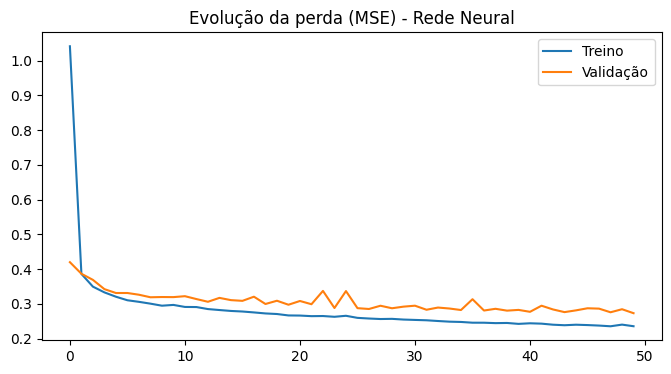

In [4]:
loss, mae = model.evaluate(X_test, y_test)
print(f"\n✅ MAE (Keras): {mae:.4f}")

# Plotar gráfico de perda
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da perda (MSE) - Rede Neural')
plt.legend()
plt.show()

# 🔹 4. Comparar com RandomForestRegressor

In [14]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
from math import sqrt

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = sqrt(mse_rf)

print(f"✅ MAE (RandomForest): {mae_rf:.4f}")
print(f"✅ RMSE (RandomForest): {rmse_rf:.4f}")

✅ MAE (RandomForest): 0.3276
✅ RMSE (RandomForest): 0.5055


# 🔹 5. Conclusão

In [16]:
if mae < mae_rf:
    print("\n🔸 O modelo Keras teve menor erro médio absoluto (melhor desempenho).")
elif mae > mae_rf:
    print("\n🔸 O modelo RandomForest teve menor erro médio absoluto (melhor desempenho).")
else:
    print("\n🔸 Ambos os modelos tiveram desempenho semelhante.")


🔸 O modelo RandomForest teve menor erro médio absoluto (melhor desempenho).
